In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('Transformed_data')

# Categorial variables won't be needed & converted into numerical ones

In [4]:
pd.set_option('max_columns', None)
data

,Unnamed: 0,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21605,21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21606,21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21607,21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [5]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

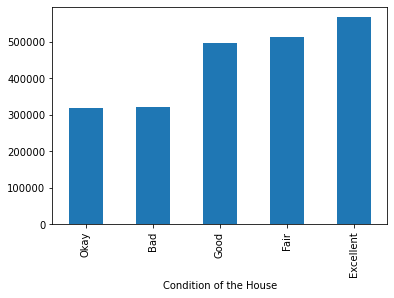

In [6]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

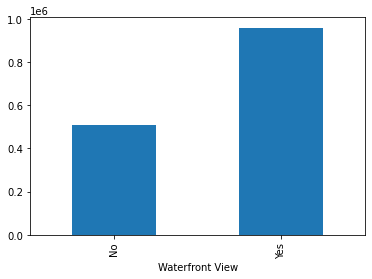

In [7]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')

# Anova

In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [9]:
data = data.rename(columns= {'Sale Price': 'Sale_Price'})
data = data.rename(columns = {'Condition of the House':'Condition_of_the_House', 'Waterfront View':'Waterfront_View','Ever Renovated':'Ever_Renovated'})

In [10]:
mod = ols('Sale_Price ~ Condition_of_the_House', data = data).fit()

In [11]:
Anova_Table = sm.stats.anova_lm(mod, typ = 2)

In [12]:
data = pd.get_dummies(data, columns = ['Condition_of_the_House'], drop_first = True)

In [13]:
data = pd.get_dummies(data, columns = ['Waterfront_View', 'Ever_Renovated'], drop_first = True)

In [14]:
data

,Unnamed: 0,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,0,0,1,0,0,0,0
21605,21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,0,0,1,0,0,0,0
21606,21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,0,0,1,0,0,0,0
21607,21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,0,0,1,0,0,0,0


In [15]:
Zip_Table = data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price', ascending = True)

In [16]:
Zip_Table['Zipcode_Group']= pd.cut(Zip_Table['Sale_Price'], bins = 10, labels = ['Zipcode_Grp_0',
                                                                                'Zipcode_Grp_1',
                                                                                'Zipcode_Grp_2',
                                                                                'Zipcode_Grp_3',
                                                                                'Zipcode_Grp_4',
                                                                                'Zipcode_Grp_5',
                                                                                'Zipcode_Grp_6',
                                                                                'Zipcode_Grp_7',
                                                                                'Zipcode_Grp_8',
                                                                                'Zipcode_Grp-9'], include_lowest = True)

In [17]:
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

In [18]:
data = pd.merge(data, Zip_Table, left_on = 'Zipcode', how = 'left', right_index = True)

In [19]:
data= data.drop(columns = 'Zipcode')

In [20]:
data

,Unnamed: 0,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Grp_0
1,1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,0,1,Zipcode_Grp_2
2,2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Grp_2
3,3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Grp_3
4,4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Grp_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,9,47.6993,-122.346,1530.0,1509,0,0,1,0,0,0,0,Zipcode_Grp_3
21605,21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,4,47.5107,-122.362,1830.0,7200,0,0,1,0,0,0,0,Zipcode_Grp_1
21606,21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,9,47.5944,-122.299,1020.0,2007,0,0,1,0,0,0,0,Zipcode_Grp_3
21607,21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,14,47.5345,-122.069,1410.0,1287,0,0,1,0,0,0,0,Zipcode_Grp_4


In [21]:
data = pd.get_dummies(data, columns= ['Zipcode_Group'], drop_first = True)

In [22]:
data

,Unnamed: 0,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Grp_1,Zipcode_Group_Zipcode_Grp_2,Zipcode_Group_Zipcode_Grp_3,Zipcode_Group_Zipcode_Grp_4,Zipcode_Group_Zipcode_Grp_5,Zipcode_Group_Zipcode_Grp_6,Zipcode_Group_Zipcode_Grp_7,Zipcode_Group_Zipcode_Grp_8,Zipcode_Group_Zipcode_Grp-9
0,0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
2,2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,9,47.6993,-122.346,1530.0,1509,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21605,21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,4,47.5107,-122.362,1830.0,7200,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
21606,21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,9,47.5944,-122.299,1020.0,2007,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21607,21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,14,47.5345,-122.069,1410.0,1287,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
data.to_csv('Transformed Data 2')